<center><h1><a href="https://challenge.xfyun.cn/topic/info?type=mental-health&ch=dw24_AtTCK9">心理健康辅助诊断挑战赛</a></h1></center>

# 一、赛事背景

随着社会发展和人们精神需求的提升，心理健康问题越来越受到关注，解决这一问题首先要了解研究对象心理健康的真实状况，即通过便捷高效、低成本的方式尽可能准确地识别研究对象真实的心理健康水平，对异常个体及时发出预警，辅助后续的诊断和干预。

得益于穿戴式设备的发展和普及，人们开始可以低成本地记录日常生活中个体特异的外在特征（例如行为活动、生理反应等），以服务于后续的分析和识别，相较于传统的问卷量表测量法，基于穿戴式生理信号的个体心理健康测评方法有望实现低成本、大样本、自动化，并且其具有客观、稳定、不易伪造的优点，在心理健康筛查、临床辅助诊断等领域拥有广阔的应用场景。

# 二、赛事任务

本赛题提供了对临床抑郁障碍患者和普通人两种人群的日常腕表测量数据。参赛选手需要根据所提供样本构建模型，识别出具有临床抑郁障碍表现的个体。

# 三、赛题提供方

清华大学心理与认知科学系张丹课题组

北京大学回龙观医院临床医学院谭淑平课题组

北京汇心健康科技有限公司

# 四、评审规则

## 1.数据说明

本数据共包含54名参与者的日常生理信号，实验对象为18~30岁之间的成年人，男女性别比例为23：31，参与者佩戴腕表采集记录时段为早上6点至下午5点，本数据已进行初步处理删去实验时段以外的数据。所有数据被划分为训练数据和测试数据，训练数据包含抑郁患者与普通人两类人群各20人，总计40人；测试数据包含两类人群各7人，总计14人。分别在日常生活中佩戴穿戴式腕表，记录其真实生活体验带来的生理变化。需要参赛选手在特征提取和模型构建上挖掘训练数据特征，实现对测试数据个体抑郁状况的有效判断。

每个个体的测量数据文件为MATLAB格式文件和csv文件（数据相同），数据结构体中包括以下几部分内容，每项子内容中均含有时间标签，可在MATLAB平台或用python读取csv文件查看：

| 变量名 | PPG    | ACC        | GSR         |
| ------ | ------ | ---------- | ----------- |
| 含义   | 脉搏波 | 三轴加速度 | 皮肤电导    |
| 采样率 | 20Hz   | 20Hz       | 40Hz        |
| 单位   | ——     | m/s2       | S(微西门子) |

其中GSR显示为0.0061为缺失值，表示实验对象未正确采集数据

## 2.评估指标

本模型依据提交的结果文件，采用准确率![img](https://openres.xfyun.cn/xfyundoc/2024-06-04/deb0b456-f1e0-491b-aaf3-2cac29637964/1717490038783/86.png)进行评价排名，如有并列情况按提交顺序排名，先提交者排在前位。

## 3. 腕表测量情况简介

腕表佩戴开机后持续发送532nm波长的绿光并测量反射光强度，心率（HR）是通过光电容积脉搏波法（PPG）测量得到。在腕表内侧装有电极，通过导电胶接触皮肤表面测量GSR。此外，腕表内置加速度计记录三轴加速度，精度为1/2048g（重力加速度单位）。

# 五、作品提交要求

1、文件格式：csv

2、文件大小：无要求

3、文件详细说明：编码为UTF-8，提交格式见样例

# 六、赛程规则

本赛题实行一轮赛制

## 【赛程周期】

6月9日-7月9日

1、6月9日10：00发布数据集（即开启比赛榜单）

2、比赛作品提交截止日期为7月9日17：00，公布名次日期为7月12日10：00

## 【现场答辩】

1、最终前三名团队将受邀参加科大讯飞AI开发者大赛总决赛并于现场进行答辩

2、答辩以（10mins陈述+5mins问答）的形式进行

3、根据作品成绩和答辩成绩综合评分（作品成绩占比70％，现场答辩分数占比30％）

# 六、奖项设置

本赛题设立一、二、三等奖共三名，具体详情如下：

## 【奖项激励】

1.  TOP3团队颁发获奖证书
2.  赛道奖金，第一名5000元、第二名3000元、第三名2000元

## 【资源激励】

1.  讯飞开放平台优质AI能力个人资源包
2.  讯飞AI全链创业扶持资源
3.  讯飞绿色实习/就业通道

注：

1.  鼓励选手分享参赛心得、参赛技术攻略、大赛相关技术或产品使用体验等文章至组委会邮箱（AICompetition@iflytek.com），有机会获得大赛周边；
2.  赛事规则及奖金发放解释权归科大讯飞所有；以上全部奖金均为税前金额，将由主办方代扣代缴个人所得税。

In [96]:
# python3 机器学习 + 人工特征
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [129]:
# 读取训练集标签
train_label = pd.read_csv('training_data/train_label.csv', encoding='gb2312')
train_label

,文件名,是否抑郁(0:无/1:有)
0,data0278,1
1,data0596,0
2,data1011,1
3,data1269,1
4,data1418,1
5,data1604,0
6,data1719,0
7,data1966,0
8,data2551,0
9,data3083,0


In [98]:
def manual_feature(df):
    feat = [
        df_batch['Motion_dataX'].mean(),
        df_batch['Motion_dataX'].max(),
        df_batch['Motion_dataX'].min(),
        df_batch['Motion_dataX'].max() - df_batch['Motion_dataX'].min(),
        df_batch['Motion_dataX'].diff(1).mean(),
        df_batch['Motion_dataX'].diff(1).max(),
        df_batch['Motion_dataX'].diff(1).min(),

        df_batch['Motion_dataY'].mean(),
        df_batch['Motion_dataY'].max(),
        df_batch['Motion_dataY'].min(),
        df_batch['Motion_dataY'].max() - df_batch['Motion_dataY'].min(),
        df_batch['Motion_dataY'].diff(1).mean(),
        df_batch['Motion_dataY'].diff(1).max(),
        df_batch['Motion_dataY'].diff(1).min(),

        df_batch['Motion_dataZ'].mean(),
        df_batch['Motion_dataZ'].max(),
        df_batch['Motion_dataZ'].min(),
        df_batch['Motion_dataZ'].max() - df_batch['Motion_dataZ'].min(),
        df_batch['Motion_dataZ'].diff(1).mean(),
        df_batch['Motion_dataZ'].diff(1).max(),
        df_batch['Motion_dataZ'].diff(1).min(),

        df_batch['GSR'].mean(),
        df_batch['GSR'].max(),
        df_batch['GSR'].min(),
        df_batch['GSR'].max() - df_batch['GSR'].min(),
        df_batch['GSR'].diff(1).mean(),
        df_batch['GSR'].diff(1).max(),
        df_batch['GSR'].diff(1).min(),
        df_batch['GSR'].isnull().mean(),

        df_batch['PPG'].mean(),
        df_batch['PPG'].max(),
        df_batch['PPG'].min(),
        df_batch['PPG'].max() - df_batch['PPG'].min(),
        df_batch['PPG'].diff(1).mean(),
        df_batch['PPG'].diff(1).max(),
        df_batch['PPG'].diff(1).min(),
    ]
    return feat

In [99]:
train_features = []

# 对训练集的个体
for sid in os.listdir('./training_data/'):
    if '.csv' in sid:
        continue

    # 三类观测数据
    df_acc = pd.read_csv(f'./training_data/{sid}/ACC.csv')
    df_gsr = pd.read_csv(f'./training_data/{sid}/GSR.csv')
    df_ppg = pd.read_csv(f'./training_data/{sid}/PPG.csv')

    # 按照时间顺序，拼接三类观测数据
    df = pd.concat([df_acc, df_gsr.iloc[::2, :-1].reset_index(drop=True), df_ppg.iloc[:, :-1]], axis=1)
    
    df['GSR'] = df['GSR'].round(4)
    df['GSR'] = df['GSR'].replace(0.0061, np.nan)
    
    print(sid, df['recording_time'].min(), df['recording_time'].max())
    label = train_label.set_index('文件名').loc[sid].values[0]

    # 拆分为更小的数据
    for idx in range(df.shape[0] // 10000):
        df_batch = df.iloc[idx*10000: (idx+1)*10000]
        feat = manual_feature(df_batch)
        feat = [sid] + feat + [label]
        train_features.append(feat)

data6787 06:00:00 16:59:59
data0596 06:00:00 16:59:59
data4929 09:07:51 16:59:59
data9133 06:00:00 16:59:59
data2551 09:56:14 16:59:59
data9157 06:00:00 16:59:59
data3083 06:00:00 16:59:59
data8147 06:00:00 16:59:59
data9908 06:00:00 16:59:59
data3571 06:00:00 16:59:59
data8526 06:00:00 16:59:59
data4217 06:00:00 16:59:59
data6557 06:00:00 15:43:05
data8002 06:00:00 16:59:59
data4983 06:00:00 16:59:59
data5108 08:25:53 16:59:59
data8909 10:29:02 16:59:59
data1011 06:00:00 16:59:59
data6323 06:00:00 16:59:59
data1966 06:00:00 16:59:59
data9594 06:00:00 16:59:59
data9575 06:00:00 16:59:59
data9648 06:00:00 16:59:59
data5428 09:00:49 16:59:59
data8491 06:00:00 16:59:59
data1269 06:00:00 16:59:59
data5929 06:00:00 16:59:59
data1604 06:00:00 16:59:59
data5751 08:50:36 16:59:59
data0278 06:00:00 16:59:59
data1418 06:00:00 14:46:01
data4072 08:19:32 16:59:59
data1719 06:00:00 16:59:59
data4972 06:00:00 16:59:59
data4853 06:00:00 16:59:59
data7577 06:00:00 16:59:59
data4352 06:15:29 16:59:59
d

In [130]:
df_batch

,Motion_dataX,Motion_dataY,Motion_dataZ,recording_time,GSR,PPG
780000,5.495752,-1.126904,12.338525,16:50:00,0.0070,136.115551
780001,3.758740,-1.531250,7.414600,16:50:00,0.0070,136.078596
780002,4.060205,-0.839795,7.684961,16:50:00,0.0070,136.059821
780003,4.141553,-0.636426,10.333545,16:50:00,0.0070,136.103630
780004,4.187012,-0.727344,9.800000,16:50:00,0.0065,136.160851
...,...,...,...,...,...,...
789995,3.931006,-1.169971,9.041553,16:58:19,0.0065,136.872530
789996,4.158301,-1.485791,8.706592,16:58:19,0.0065,136.872530
789997,3.665430,-1.504932,8.694629,16:58:19,0.0065,136.872530
789998,3.866406,-1.363770,7.895508,16:58:19,0.0065,136.872530


In [128]:
df

,Motion_dataX,Motion_dataY,Motion_dataZ,recording_time,GSR,PPG
0,1.014453,-0.866113,-9.955518,06:00:00,0.0115,116.709471
1,1.004883,-0.890039,-9.974658,06:00:00,0.0115,116.709471
2,1.031201,-0.835010,-9.974658,06:00:00,0.0115,116.709471
3,1.047949,-0.858936,-9.972266,06:00:00,0.0115,116.709471
4,1.033594,-0.858936,-10.005762,06:00:00,0.0110,116.709471
...,...,...,...,...,...,...
791995,3.868799,-1.445117,8.816650,16:59:59,0.0065,137.294531
791996,3.892725,-1.457080,8.816650,16:59:59,NaN,137.294531
791997,3.864014,-1.435547,8.795117,16:59:59,0.0070,137.294531
791998,3.847266,-1.430762,8.823828,16:59:59,0.0070,137.294531


In [100]:
test_features = []
for sid in os.listdir('./test_data/'):
    if '.csv' in sid:
        continue

    df_acc = pd.read_csv(f'./test_data/{sid}/ACC.csv')
    df_gsr = pd.read_csv(f'./test_data/{sid}/GSR.csv')
    df_ppg = pd.read_csv(f'./test_data/{sid}/PPG.csv')
    df = pd.concat([df_acc, df_gsr.iloc[::2, :-1].reset_index(drop=True), df_ppg.iloc[:, :-1]], axis=1)
    
    df['GSR'] = df['GSR'].round(4)
    df['GSR'] = df['GSR'].replace(0.0061, np.nan)
    
    print(sid, df['recording_time'].min(), df['recording_time'].max())
    for idx in range(df.shape[0] // 10000):
        df_batch = df.iloc[idx*10000: (idx+1)*10000]
        feat = manual_feature(df_batch)
        feat = [sid] + feat
        test_features.append(feat)

data0856 06:00:00 16:59:59
data0562 09:11:31 16:59:59
data0461 06:00:00 16:59:59
data1576 06:00:00 16:59:59
data0129 06:00:00 16:59:59
data0699 06:00:00 16:59:59
data5166 08:11:03 16:59:59
data9057 06:00:00 16:59:59
data0702 06:00:00 16:59:59
data0671 10:01:30 16:59:59
data0999 06:00:00 16:59:59
data3862 06:00:00 16:59:59
data0882 09:41:24 16:59:59
data0984 06:00:00 16:59:59
data0172 10:43:28 16:59:59
data0548 06:00:00 16:59:59
data0369 09:10:05 16:59:59
data0157 10:23:05 16:59:59
data4722 08:58:50 16:18:37
data5468 06:00:00 16:59:59
data0645 07:19:29 16:59:59
data0667 06:00:00 16:59:59
data4998 09:26:17 16:59:59
data0377 08:38:51 16:59:59
data0541 06:00:00 16:59:59
data0943 06:00:00 16:24:55
data1428 06:00:00 16:59:59
data0191 08:23:27 16:59:59
data7329 07:34:22 16:59:59
data0033 09:41:01 16:59:59
data0982 11:10:27 16:59:59
data7431 06:00:00 16:59:59
data0302 06:00:00 16:59:59
data0418 06:00:00 16:59:59
data9339 06:00:00 16:59:59
data9597 06:00:00 16:59:59
data2381 06:00:00 16:59:59
d

<Axes: xlabel='recording_time'>

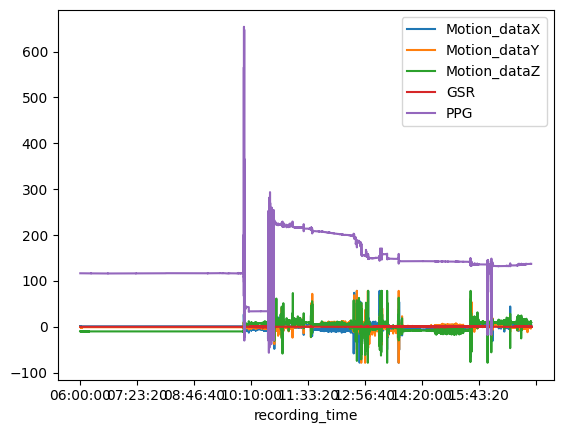

In [124]:
df.set_index('recording_time').plot()

In [101]:
train_features = pd.DataFrame(train_features)
test_features = pd.DataFrame(test_features)

In [131]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,data6787,6.458155,12.183008,-3.533838,15.716846,0.000037,6.778174,-5.560352,-2.107983,12.570605,...,-0.0489,0.0000,0.460892,0.610352,0.391006,0.219345,-0.000002,0.071526,-0.065565,1
1,data6787,3.351987,24.571777,-11.278613,35.850391,-0.000816,14.963184,-28.782715,2.127313,22.526123,...,-0.0538,0.0000,0.498489,0.610352,0.390112,0.220239,0.000000,0.071526,-0.065565,1
2,data6787,-1.592960,4.158301,-1.753760,5.912061,0.000010,3.320898,-1.631738,7.598320,9.237744,...,-0.0181,0.0000,0.468828,0.610352,0.390112,0.220239,0.000002,0.071526,-0.065565,1
3,data6787,0.979819,21.432715,-32.407471,53.840186,0.001060,41.061426,-32.345264,3.004144,40.118750,...,-0.0469,0.0000,0.468561,0.610352,0.391006,0.219345,0.000018,0.071526,-0.065565,1
4,data6787,-3.194849,24.724902,-26.454736,51.179639,-0.000430,22.779736,-18.879834,-5.450964,21.765283,...,-0.0675,0.0000,0.464485,0.610352,0.398457,0.211895,0.000000,0.065565,-0.065565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,data7572,-1.613001,4.710986,-11.946143,16.657129,0.000127,6.184814,-5.589062,5.892832,18.784131,...,-0.0300,0.0000,47.790779,62.781274,41.992068,20.789206,-0.000854,2.166927,-2.043545,0
2867,data7572,-1.882508,5.067480,-12.692627,17.760107,-0.000130,10.307227,-9.020020,6.777731,24.346875,...,-0.5259,0.0807,45.701704,71.832538,35.800934,36.031604,-0.000620,2.786815,-2.468526,0
2868,data7572,-1.133378,11.754736,-10.512988,22.267725,0.000105,16.683447,-11.929395,6.797256,28.328125,...,-0.1321,0.0745,42.063729,55.252016,35.319626,19.932389,-0.000165,2.184510,-0.984967,0
2869,data7572,-2.470743,6.261377,-13.424756,19.686133,-0.000108,6.086719,-5.713477,6.163160,18.635791,...,-0.0757,0.0983,45.652106,68.050027,37.066042,30.983984,0.000208,2.878904,-1.478195,0


In [103]:
pred = cross_val_predict(
    LogisticRegression(max_iter=1000),
    train_features.iloc[:, 1:-1].fillna(0),
    train_features.iloc[:, -1]
)

f1_score(train_features.iloc[:, -1], pred)

/home/lyz/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lyz/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.6277128547579299

In [104]:
pred = cross_val_predict(
    DecisionTreeClassifier(),
    train_features.iloc[:, 1:-1].fillna(0),
    train_features.iloc[:, -1]
)

f1_score(train_features.iloc[:, -1], pred)

0.6821360457724094

In [105]:
pred = cross_val_predict(
    LGBMClassifier(),
    train_features.iloc[:, 1:-1],
    train_features.iloc[:, -1]
)

f1_score(train_features.iloc[:, -1], pred)

[LightGBM] [Info] Number of positive: 1242, number of negative: 1054
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9168
[LightGBM] [Info] Number of data points in the train set: 2296, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540941 -> initscore=0.164131
[LightGBM] [Info] Start training from score 0.164131
[LightGBM] [Info] Number of positive: 1242, number of negative: 1055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9161
[LightGBM] [Info] Number of data points in the train set: 2297, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540705 -> initscore=0.163182
[LightGBM] [Info] Start training from score 0.163182
[LightGBM] [Info] Numb

0.7565301515640116

In [108]:
model = LGBMClassifier()
model.fit(train_features.iloc[:, 1:-1], train_features.iloc[:, -1])
test_pred = model.predict(test_features.iloc[:, 1:])

[LightGBM] [Info] Number of positive: 1553, number of negative: 1318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9170
[LightGBM] [Info] Number of data points in the train set: 2871, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540927 -> initscore=0.164073
[LightGBM] [Info] Start training from score 0.164073


In [109]:
test_pred

array([0, 1, 1, ..., 1, 1, 1])

In [111]:
test_features['label'] = test_pred

In [116]:
# 测试集包含多个预测
pred = test_features.groupby(0)['label'].mean() > 0.5

In [120]:
pred = pred.astype(int).reset_index()

In [122]:
pred.to_csv('lgb.csv', index=None, header=None)
# 初赛：0.82051

# 七、改进方向


1. **增加人工特征：**
   - 对数据进行进一步的特征工程处理，增加更多的统计特征（如方差、标准差、偏度、峰度等）。
   - 引入频域特征，通过对时间序列信号进行傅里叶变换提取频域特征。
   - 针对每个传感器数据，增加滑动窗口的特征（如滑动窗口内的均值、标准差等）。

2. **使用深度学习方法：**
   - **卷积神经网络（CNN）：** 可以用于提取时序信号中的局部特征，适合处理一维时序数据。
   - **循环神经网络（RNN）：** 尤其是LSTM或GRU，可以捕捉时间序列中的长期依赖关系。
   - **混合模型：** 将CNN用于提取局部特征，然后将提取的特征输入到LSTM中，以捕捉长期依赖关系。

3. **数据预处理和增强：**
   - 对数据进行归一化处理，保证各特征具有相同的量纲。
   - 增加数据增强手段，如加噪、随机裁剪等，增加数据的多样性，提高模型的鲁棒性。
